# OBJECTIVE
Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

What is the overall sales trend?

Which are the Top 10 products by sales?

Which are the Most Selling Products?

Which is the most preferred Ship Mode?

Which are the Most Profitable Category and Sub-Category?

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [6]:
 data = pd.read_excel("superstore_sales.xlsx")

In [8]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [10]:
data.shape

(51290, 21)

In [12]:
data.columns # Columns present in the dataset

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [18]:
data.isnull().sum() # Checking missing values

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [20]:
data.describe().round() # Generating descriptive statistics summary

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.0,3.0,0.0,29.0,26.0,2013.0
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,31.0,2.0,0.0,0.0,3.0,2012.0
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.0,3.0,0.0,9.0,8.0,2013.0
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.0,5.0,0.0,37.0,24.0,2014.0
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.0,14.0,1.0,8400.0,934.0,2014.0
std,NaN,NaN,488.0,2.0,0.0,174.0,57.0,1.0


# . WHAT IS THE OVERALL SALES TREND ?

In [27]:
# Getting monyh year from order_date
data["month_year"] = data["order_date"].apply(lambda x: x.strftime("%Y-%m") )

In [35]:
# grouping month_year by sales
data_temp = data.groupby('month_year')['sales'].sum().reset_index()

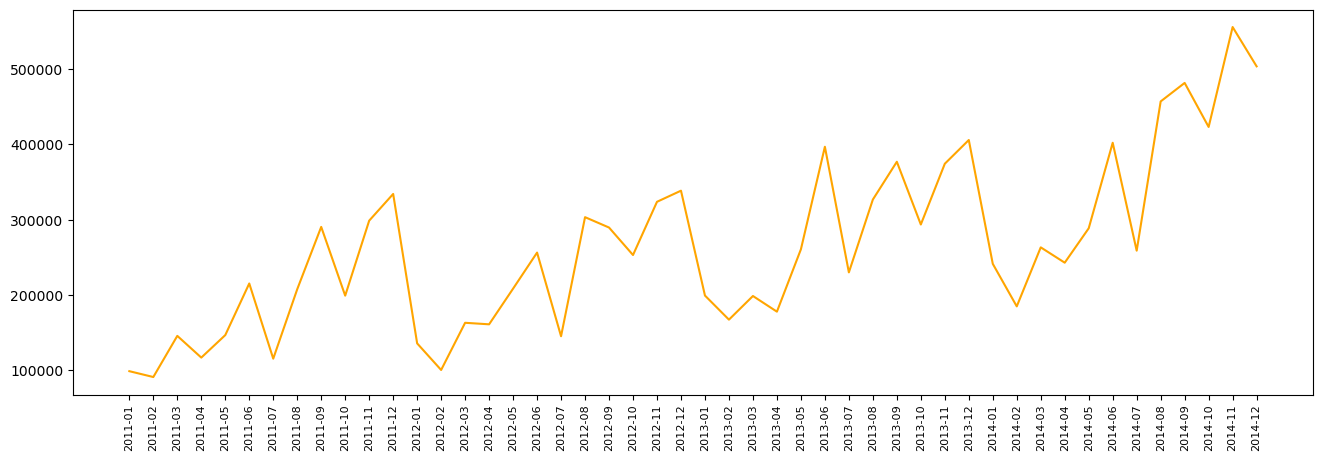

In [41]:
# Setting the figure size
plt.figure(figsize=(16,5))
plt.plot(data_temp["month_year"],data_temp["sales"],color="orange")
plt.xticks(rotation="vertical" , size =8)
plt.show()

# . WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [46]:
# Grouping products by sales
product_sales = pd.DataFrame(data.groupby('product_name')['sales'].sum())

# Sorting the dataframes in descending order
product_sales.sort_values(by = ['sales'] , inplace = True , ascending = False)

#Top 10 products by sales
product_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


# . WHICH ARE THE MOST SELLING PRODUCTS?

In [51]:
# Grouping products by quantity
best_selling_products = pd.DataFrame(data.groupby('product_name')['quantity'].sum())

# Sorting the dataframe in descending order
best_selling_products.sort_values( by=['quantity'] , inplace = True , ascending = False)

# Most selling products
89best_selling_products[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


# . WHAT IS THE MOST PREFERRED SHIP MODE?

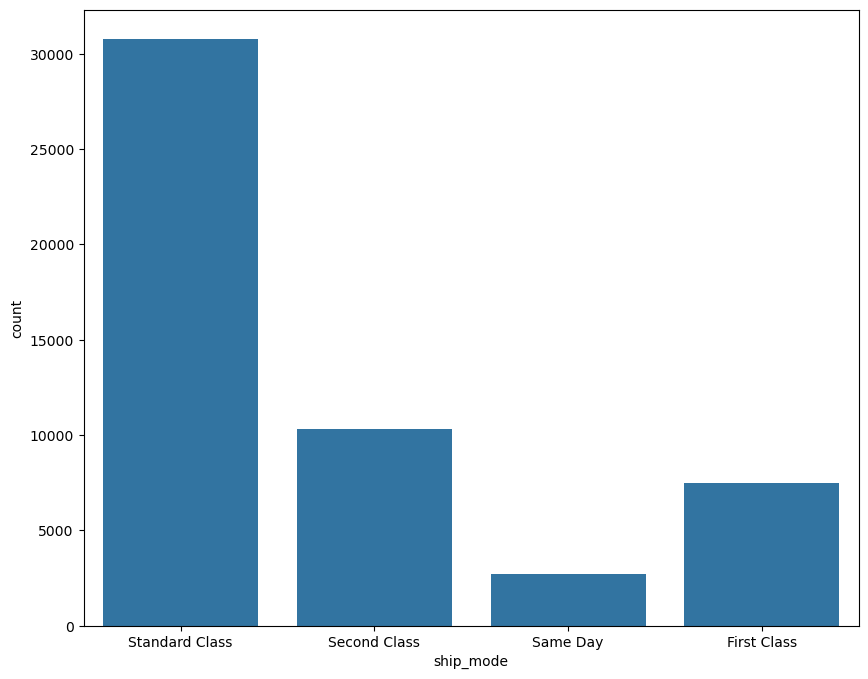

In [64]:
# Setting the figure size
plt.figure(figsize = (10,8))

#countplot : Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data = data)

#Display the figure
plt.show()

# . WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [73]:
# Grouping products by Categor and Sub_Category
category_subcategory = pd.DataFrame(data.groupby(["category","sub_category"])["profit"].sum())

# Sorting the values
category_subcategory.sort_values(["category","sub_category"] , ascending = False)

profit
category        sub_category              
Technology      Phones        216717.00580
                Machines       58867.87300
                Copiers       258567.54818
                Accessories   129626.30620
Office Supplies Supplies       22583.26310
                Storage       108461.48980
                Paper          59207.68270
                Labels         15010.51200
                Fasteners      11525.42410
                Envelopes      29601.11630
                Binders        72449.84600
                Art            57953.91090
                Appliances    141680.58940
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950